In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [3]:
data = pd.read_csv('smokingData.csv')

In [4]:
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [6]:
data.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [7]:
print(data['sex'].value_counts())
print("--------------------------------\n")
print(data['is_smoking'].value_counts())

sex
F    1923
M    1467
Name: count, dtype: int64
--------------------------------

is_smoking
NO     1703
YES    1687
Name: count, dtype: int64


In [8]:
data['sex'] = data['sex'].map({'F': 0, 'M': 1})
data['is_smoking'] = data['is_smoking'].map({'NO': 0, 'YES': 1})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   int64  
 4   is_smoking       3390 non-null   int64  
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [9]:
null_counts = data.isnull().sum()
missing_columns = null_counts[null_counts > 0].index

missing_columns_dtypes = data[missing_columns].dtypes

missing_info = pd.DataFrame({
    'Null Count': null_counts[missing_columns],
    'Data Type': missing_columns_dtypes
})

print(missing_info)

            Null Count Data Type
education           87   float64
cigsPerDay          22   float64
BPMeds              44   float64
totChol             38   float64
BMI                 14   float64
heartRate            1   float64
glucose            304   float64


In [10]:
print("Original Data : ",data.shape)
data = data.dropna()
print("After Dropping Missing Values : ",data.shape)

Original Data :  (3390, 17)
After Dropping Missing Values :  (2927, 17)


In [11]:
data.drop(['id'],axis=1,inplace=True)

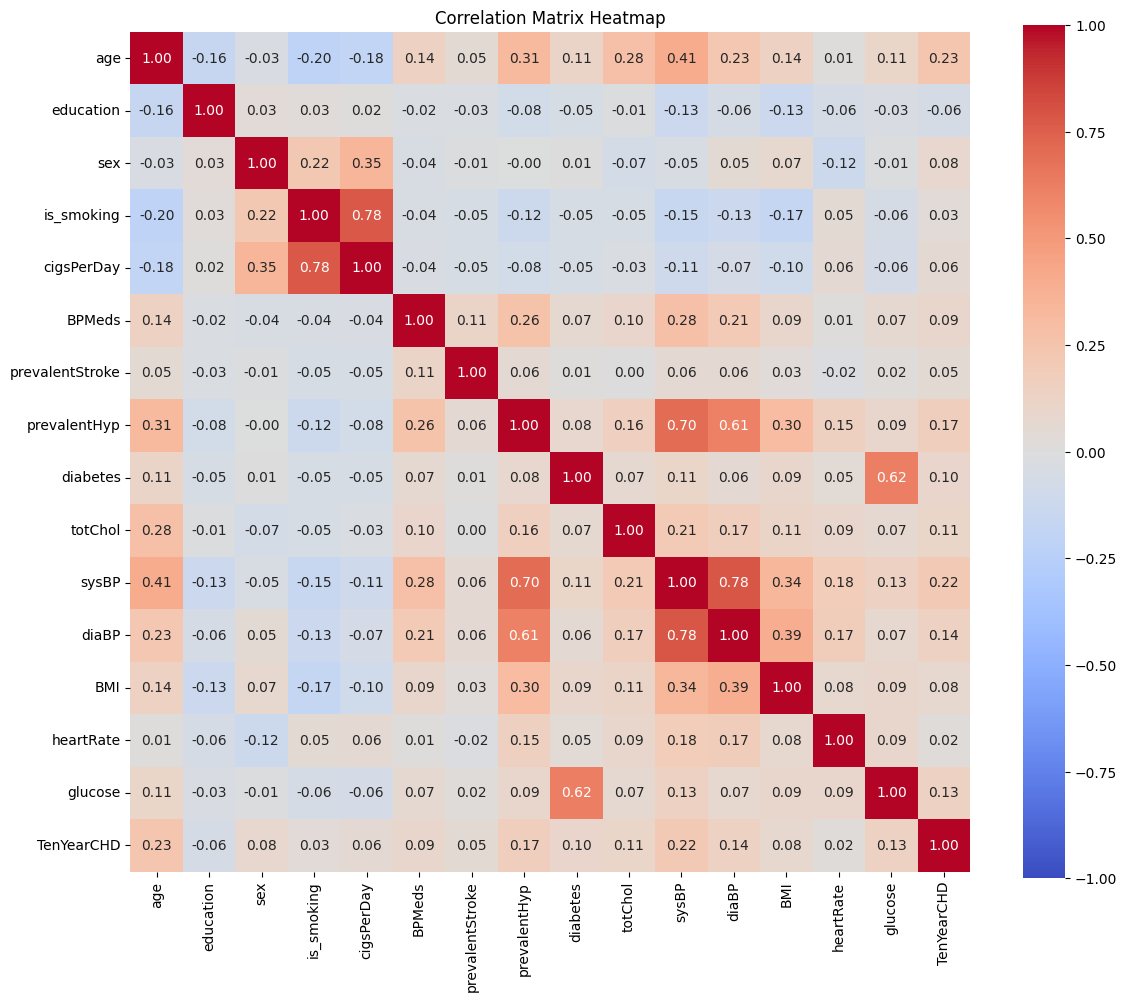

In [12]:
plt.figure(figsize=(12, 10))  
corr_matrix = data.corr()

sns.heatmap(corr_matrix, 
            annot=True,           
            cmap='coolwarm',     
            vmin=-1,              
            vmax=1,               
            center=0,            
            fmt='.2f',            
            square=True)          

plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

In [13]:
selected_features = [
    'sysBP',          
    'age',            
    'diabetes',        
    'totChol',  
    'glucose',       
    'sex',            
    'is_smoking'      
]

target = 'TenYearCHD'

X = data[selected_features]
y = data[target]

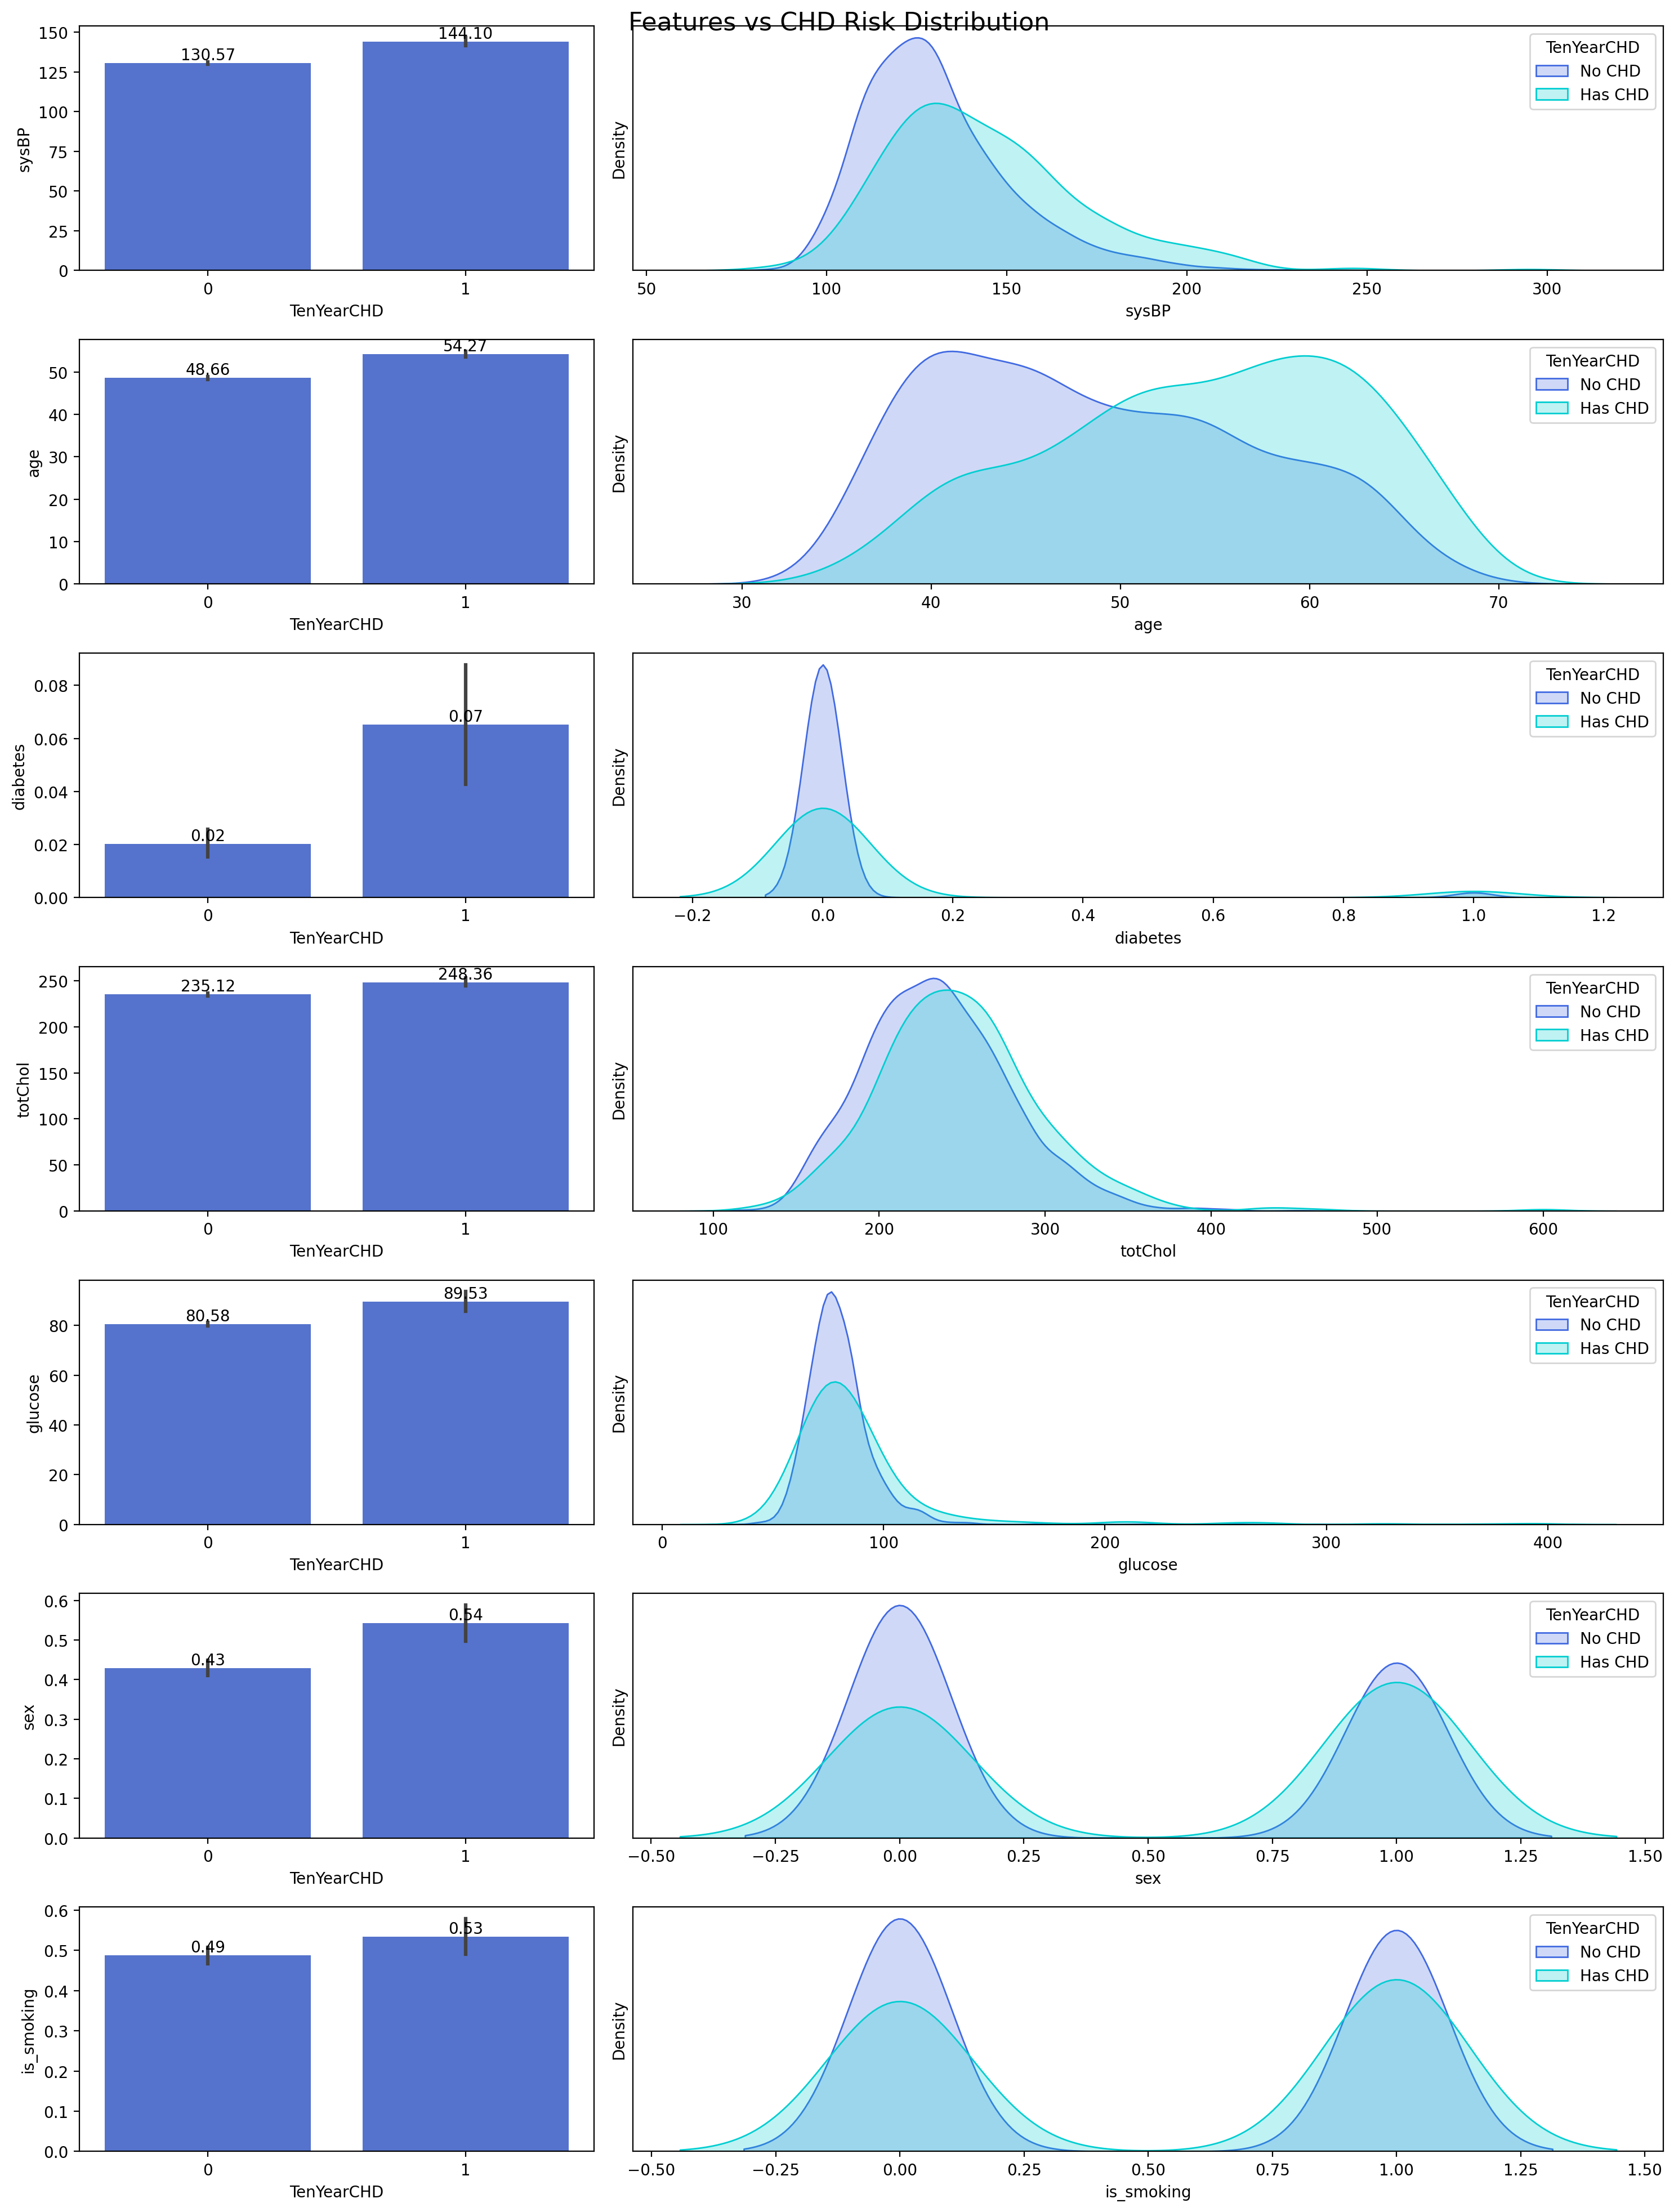

In [14]:
# Set color palette
sns.set_palette(['royalblue', 'darkturquoise'])

# Create subplots
fig, ax = plt.subplots(len(selected_features), 2, figsize=(15,20), dpi=200, gridspec_kw={'width_ratios': [1, 2]})

# Plot for each numerical feature
for i, col in enumerate(selected_features):
    # Left plot: Bar plot showing mean value for each target class
    sns.barplot(data=data, x='TenYearCHD', y=col, ax=ax[i,0])
    
    # Right plot: Distribution comparison between target classes
    sns.kdeplot(data=data[data['TenYearCHD']==0], x=col, fill=True, ax=ax[i,1], label='No CHD')
    sns.kdeplot(data=data[data['TenYearCHD']==1], x=col, fill=True, ax=ax[i,1], label='Has CHD')
    
    # Customize right plot
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='TenYearCHD')
    
    # Add labels to bars
    for container in ax[i,0].containers:
        ax[i,0].bar_label(container, fmt='%.2f')

plt.suptitle('Features vs CHD Risk Distribution', fontsize=16)
plt.tight_layout()
plt.show()

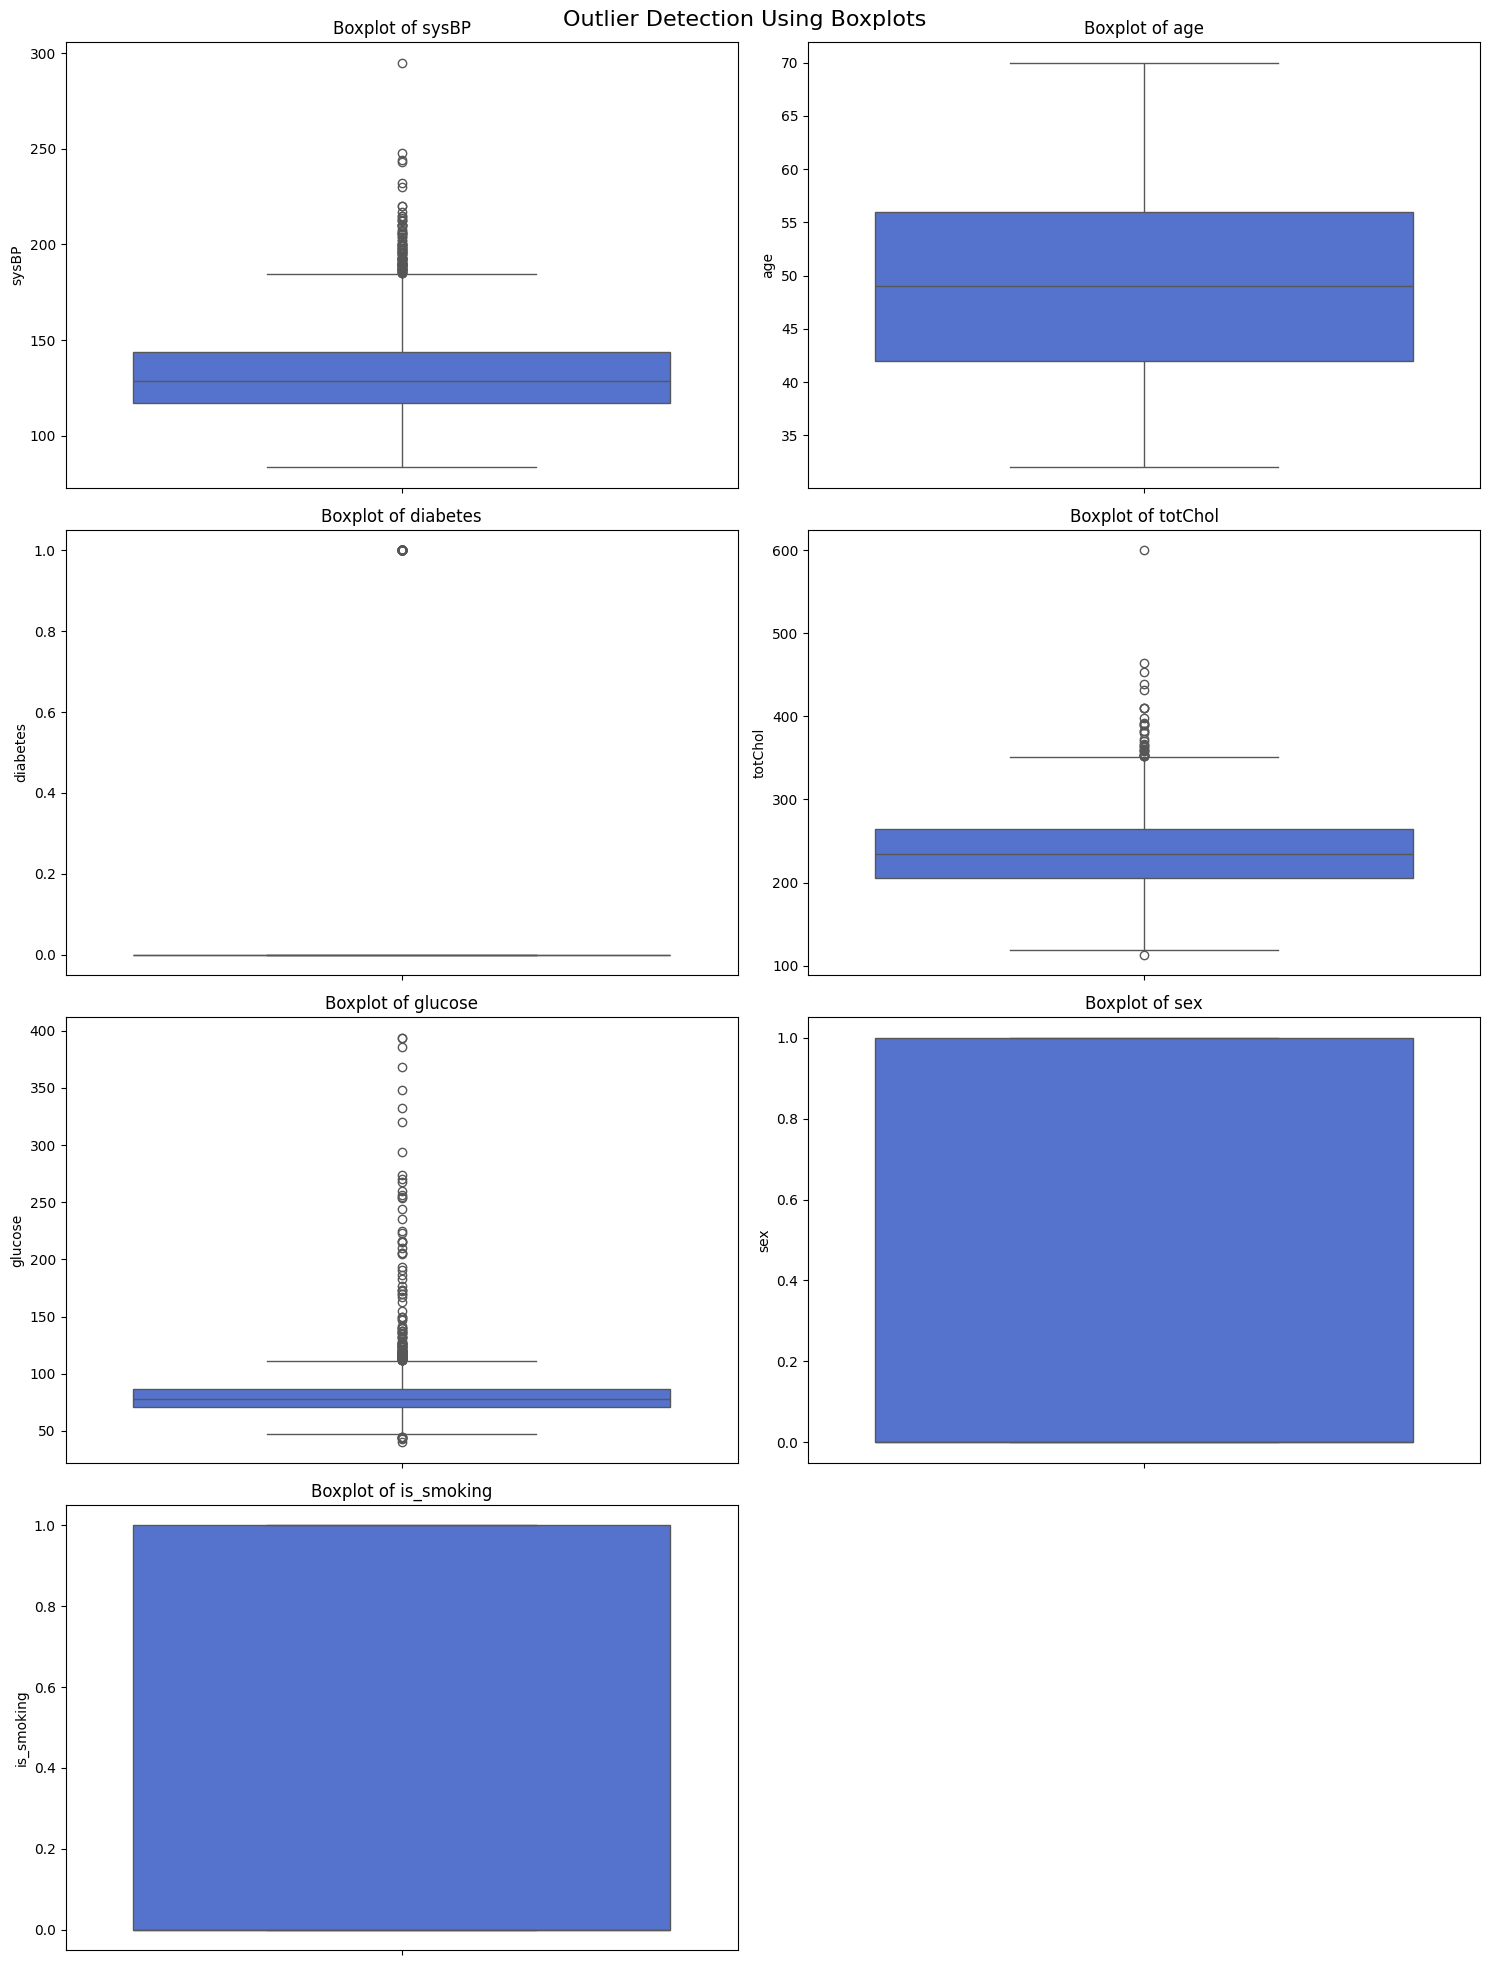

In [15]:
# Create boxplots for outlier detection
plt.figure(figsize=(15, 20))

# Create subplots for each feature
for i, feature in enumerate(selected_features, 1):
    plt.subplot(len(selected_features)//2 + 1, 2, i)
    
    # Create boxplot
    sns.boxplot(data=data, y=feature)
    plt.title(f'Boxplot of {feature}')
    
    # Rotate x-axis labels if needed
    plt.xticks(rotation=45)

plt.suptitle('Outlier Detection Using Boxplots', fontsize=16)
plt.tight_layout()
plt.show()

Removed 90 outliers from sysBP
Removed 0 outliers from age
Removed 69 outliers from diabetes
Removed 30 outliers from totChol
Removed 84 outliers from glucose
Removed 0 outliers from sex
Removed 0 outliers from is_smoking

Total rows before: 2927
Total rows after: 2654


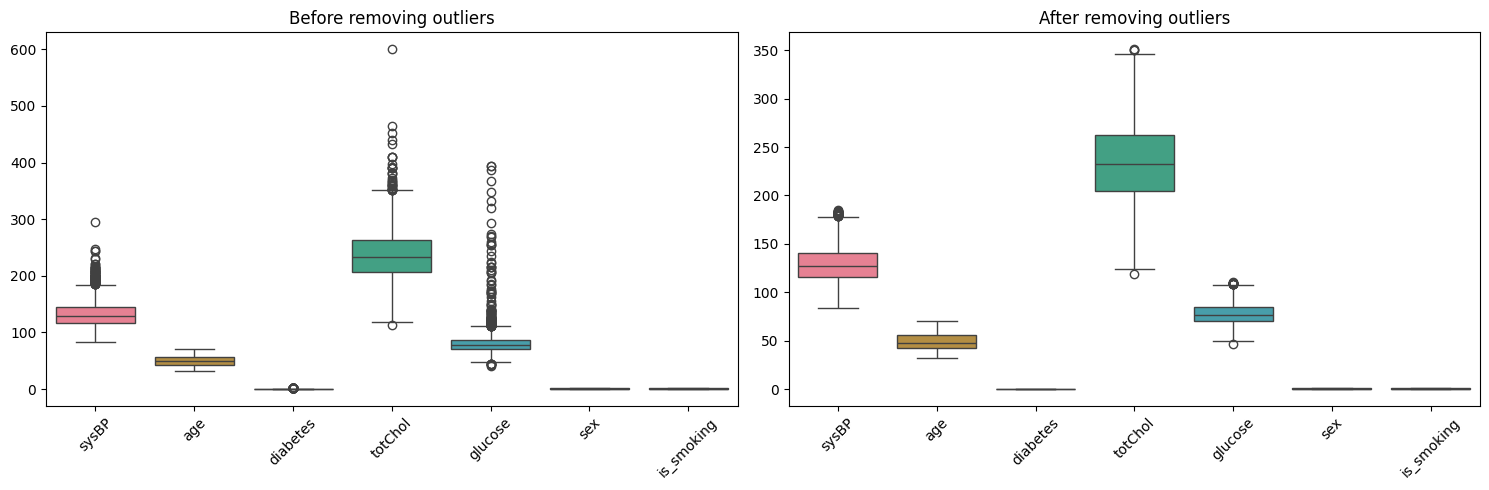

In [16]:
def remove_outliers(df, features):
    df_clean = df.copy()
    outliers_removed = 0
    
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define outlier boundaries
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count outliers
        outliers = df_clean[(df_clean[feature] < lower_bound) | 
                           (df_clean[feature] > upper_bound)].shape[0]
        
        # Remove outliers
        df_clean = df_clean[(df_clean[feature] >= lower_bound) & 
                           (df_clean[feature] <= upper_bound)]
        
        print(f"Removed {outliers} outliers from {feature}")
    
    print(f"\nTotal rows before: {len(df)}")
    print(f"Total rows after: {len(df_clean)}")
    
    # Plot before/after boxplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    sns.boxplot(data=df[selected_features], ax=ax1)
    ax1.set_title('Before removing outliers')
    ax1.tick_params(axis='x', rotation=45)
    
    sns.boxplot(data=df_clean[selected_features], ax=ax2)
    ax2.set_title('After removing outliers')
    ax2.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    return df_clean

# Apply outlier removal
data_clean = remove_outliers(data, selected_features)

Best parameters: {'C': np.float64(0.004832930238571752), 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}

Best cross-validation score: 0.7082476331005138

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.61      0.74       454
           1       0.25      0.75      0.37        77

    accuracy                           0.63       531
   macro avg       0.59      0.68      0.56       531
weighted avg       0.84      0.63      0.69       531



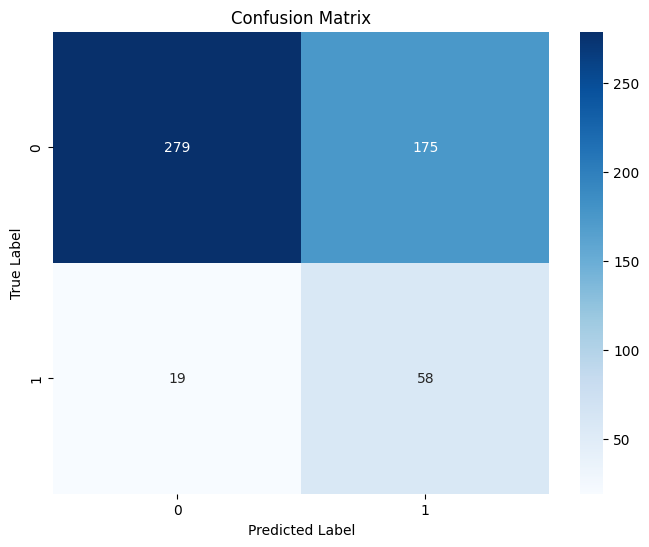

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Split data
X = data_clean[selected_features]
y = data_clean[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grid
param_grid = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'class_weight': ['balanced', None]
}
# Create and fit GridSearchCV
grid_search = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)

# Get best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test_scaled)

# Print results
print("Best parameters:", grid_search.best_params_)
print("\nBest cross-validation score:", grid_search.best_score_)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Best parameters: {'class_weight': 'balanced', 'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 2}

Best cross-validation score: 0.6329234717726182

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.55      0.69       454
           1       0.23      0.81      0.36        77

    accuracy                           0.59       531
   macro avg       0.59      0.68      0.53       531
weighted avg       0.84      0.59      0.65       531



/home/codespace/.local/lib/python3.12/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


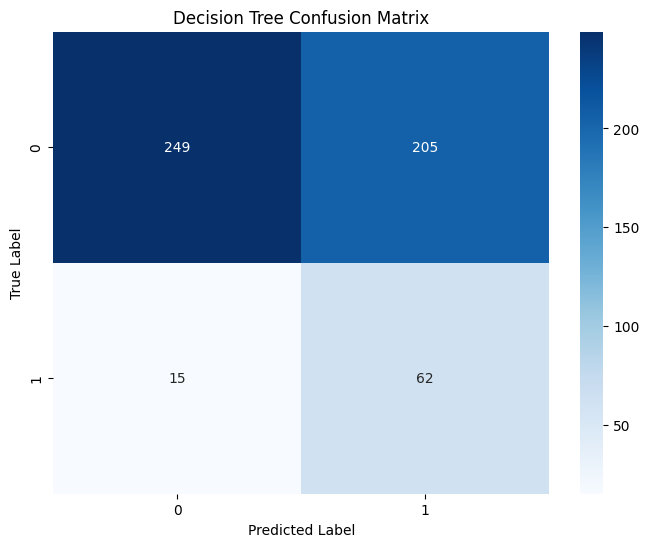

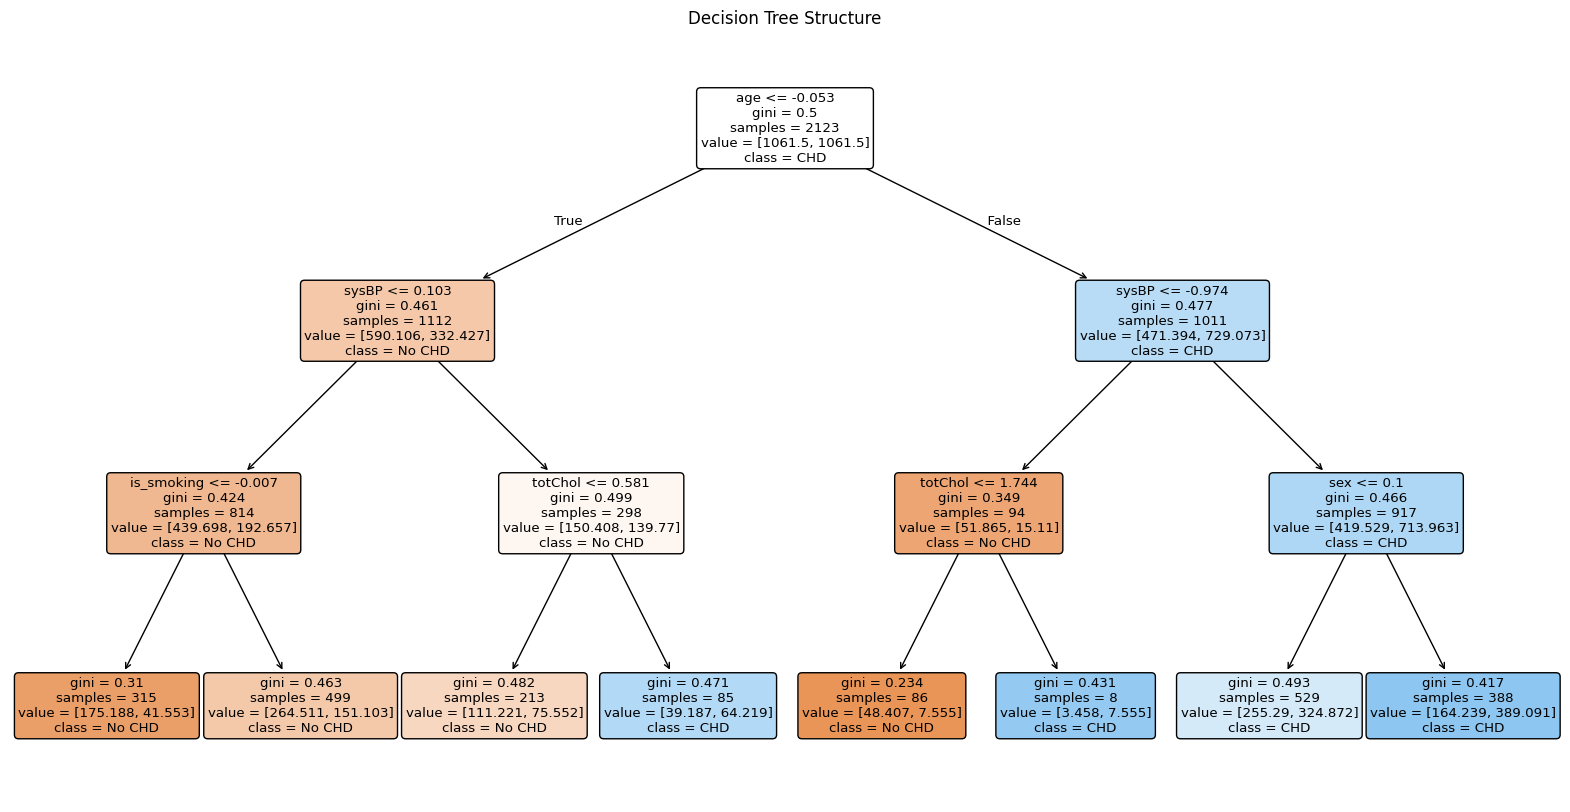

In [18]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Parameter grid for DecisionTreeClassifier with class_weight set to 'balanced'
param_grid = {
    'max_depth': [3, 5, 7, 9, 11, 13, 15],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'class_weight': ['balanced']
}

# Create and fit GridSearchCV
dt_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
dt_grid.fit(X_train_scaled, y_train)

# Get best model
best_dt = dt_grid.best_estimator_
y_pred_dt = best_dt.predict(X_test_scaled)

# Print results
print("Best parameters:", dt_grid.best_params_)
print("\nBest cross-validation score:", dt_grid.best_score_)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Visualize tree structure
plt.figure(figsize=(20,10))
plot_tree(best_dt, feature_names=selected_features, class_names=['No CHD', 'CHD'], 
          filled=True, rounded=True)
plt.title('Decision Tree Structure')
plt.show()